# Lend or Lose (Loan-Default Prediction)

<p style="font-size:16px;">In this project,we are using machine learning to predict the chances of a person whether they would pay the loan back or not,i.e predicting loan defaulters. Therefore, one would be able to understand and use different machine learning models to understand the behavior of the user and whether there is a possibility to pay back the loan.
<br/> 
Firstly, we are understanding the data(EDA), then based on that we will do the data cleaning, some feature engineering and preprocessing. Then we will train the model on the processed data, by using different models and fine tunning them to get the best model. Once we get the best trained model we will use that for final predictions on the test dataset.</p>

## Exploratory Data Analysis (EDA)

In [140]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Loading data
train_df = pd.read_csv('/kaggle/input/ml-loan-default/train.csv')
test_df = pd.read_csv('/kaggle/input/ml-loan-default/test.csv')

#to make code looks neater
import warnings
warnings.filterwarnings("ignore")

# Drop unnecessary columns
train_df = train_df.drop(columns=['LoanID'])

### Description of the dataset

In [141]:
print("Train DataFrame - First 5 Rows:")
display(train_df.head())

print("\n\n")

print("Test DataFrame - First 5 Rows:")
display(test_df.head())

Train DataFrame - First 5 Rows:


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,18,137576,209136,846,26,2,10.47,60,0.81,High School,Self-employed,Single,Yes,No,Business,No,0
1,47,57194,5970,748,30,2,19.72,36,0.73,High School,Unemployed,Divorced,No,Yes,Education,No,0
2,26,84328,95065,453,7,2,24.25,12,0.45,Master's,Self-employed,Married,No,No,Other,Yes,0
3,53,49795,229582,533,107,3,14.44,60,0.17,Bachelor's,Self-employed,Single,Yes,No,Auto,Yes,1
4,49,115450,22072,840,0,4,24.48,12,0.11,Bachelor's,Part-time,Single,No,Yes,Education,Yes,0





Test DataFrame - First 5 Rows:


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,CKV34LU7V7,55,112656,92393,581,113,2,23.54,36,0.15,PhD,Self-employed,Single,Yes,Yes,Home,No
1,62KTYNH93J,56,91569,131575,641,54,1,15.19,12,0.43,High School,Part-time,Divorced,Yes,Yes,Education,Yes
2,JGFUSOIUH7,26,78169,75417,569,105,3,18.02,12,0.29,Master's,Part-time,Married,Yes,Yes,Education,Yes
3,4538THBHOX,26,63033,10804,326,118,1,14.71,24,0.41,High School,Part-time,Single,No,No,Business,Yes
4,DXLNA06JHR,24,29665,21182,662,102,3,15.02,60,0.69,PhD,Unemployed,Single,No,Yes,Business,Yes


In [142]:
print(f"Train DataFrame Shape: {train_df.shape}")
print(f"Test DataFrame Shape: {test_df.shape}")

Train DataFrame Shape: (204277, 17)
Test DataFrame Shape: (51070, 17)


In [143]:
print("Train DataFrame Info:")
print(train_df.info())
print("\n\n")
print("Test DataFrame Info:")
print(test_df.info())

Train DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204277 entries, 0 to 204276
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             204277 non-null  int64  
 1   Income          204277 non-null  int64  
 2   LoanAmount      204277 non-null  int64  
 3   CreditScore     204277 non-null  int64  
 4   MonthsEmployed  204277 non-null  int64  
 5   NumCreditLines  204277 non-null  int64  
 6   InterestRate    204277 non-null  float64
 7   LoanTerm        204277 non-null  int64  
 8   DTIRatio        204277 non-null  float64
 9   Education       204277 non-null  object 
 10  EmploymentType  204277 non-null  object 
 11  MaritalStatus   204277 non-null  object 
 12  HasMortgage     204277 non-null  object 
 13  HasDependents   204277 non-null  object 
 14  LoanPurpose     204277 non-null  object 
 15  HasCoSigner     204277 non-null  object 
 16  Default         204277 non-null  i

In [144]:
print("Train DataFrame Summary Statistics:")
display(train_df.describe().round(2))

print("\n\n")

print("Test DataFrame Summary Statistics:")
display(test_df.describe().round(2))

Train DataFrame Summary Statistics:


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,204277.00,204277.00,204277.00,204277.00,204277.00,204277.00,204277.00,204277.00,204277.00,204277.00
mean,43.49,82506.23,127547.50,574.08,59.51,2.50,13.49,36.01,0.50,0.12
std,15.00,38952.10,70855.06,158.88,34.65,1.12,6.64,16.94,0.23,0.32
min,18.00,15000.00,5001.00,300.00,0.00,1.00,2.00,12.00,0.10,0.00
25%,31.00,48878.00,66059.00,437.00,30.00,2.00,7.76,24.00,0.30,0.00
50%,43.00,82400.00,127603.00,574.00,59.00,3.00,13.45,36.00,0.50,0.00
75%,56.00,116247.00,188843.00,712.00,90.00,4.00,19.24,48.00,0.70,0.00
max,69.00,149999.00,249999.00,849.00,119.00,4.00,25.00,60.00,0.90,1.00





Test DataFrame Summary Statistics:


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio
count,51070.00,51070.00,51070.00,51070.00,51070.00,51070.00,51070.00,51070.00,51070.00
mean,43.53,82471.61,127704.34,575.02,59.68,2.50,13.51,36.09,0.50
std,14.97,39006.99,70783.80,159.01,34.63,1.12,6.64,17.07,0.23
min,18.00,15000.00,5000.00,300.00,0.00,1.00,2.00,12.00,0.10
25%,31.00,48616.75,66506.25,437.00,30.00,1.00,7.80,24.00,0.30
50%,43.00,82686.50,127330.00,575.00,60.00,2.00,13.48,36.00,0.50
75%,57.00,116136.25,189465.75,713.00,90.00,3.00,19.28,48.00,0.70
max,69.00,149994.00,249986.00,849.00,119.00,4.00,25.00,60.00,0.90


In [145]:
print("\nMissing values in training data:")
display(train_df.isnull().sum())

print("\n\n");

print("\nMissing values in testing data:")
display(test_df.isnull().sum())


Missing values in training data:


Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64





Missing values in testing data:


LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
dtype: int64

> There are no missing values hence there is no need for handling missing values or any imputer

### Loans based on LoanPurpose

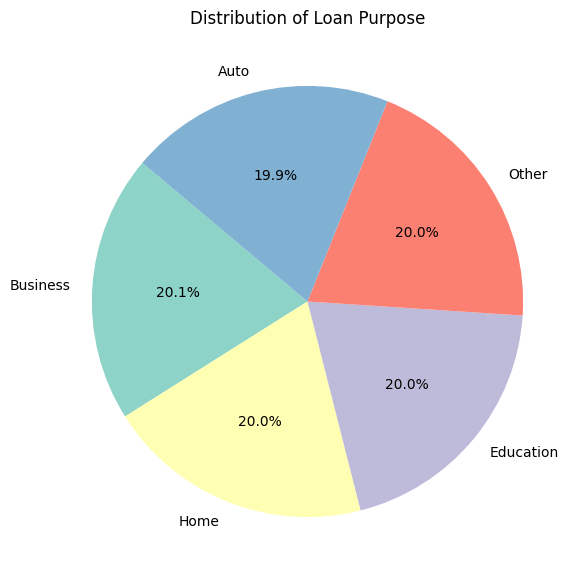

In [146]:
plt.figure(figsize=(10, 7))
loan_purpose_counts = train_df['LoanPurpose'].value_counts()
plt.pie(loan_purpose_counts, labels=loan_purpose_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))

plt.title('Distribution of Loan Purpose')
plt.show()

### Distributions of Numerical Features

In [147]:
numerical_features = train_df.select_dtypes(include=np.number).columns.tolist()
display(numerical_features)

['Age',
 'Income',
 'LoanAmount',
 'CreditScore',
 'MonthsEmployed',
 'NumCreditLines',
 'InterestRate',
 'LoanTerm',
 'DTIRatio',
 'Default']

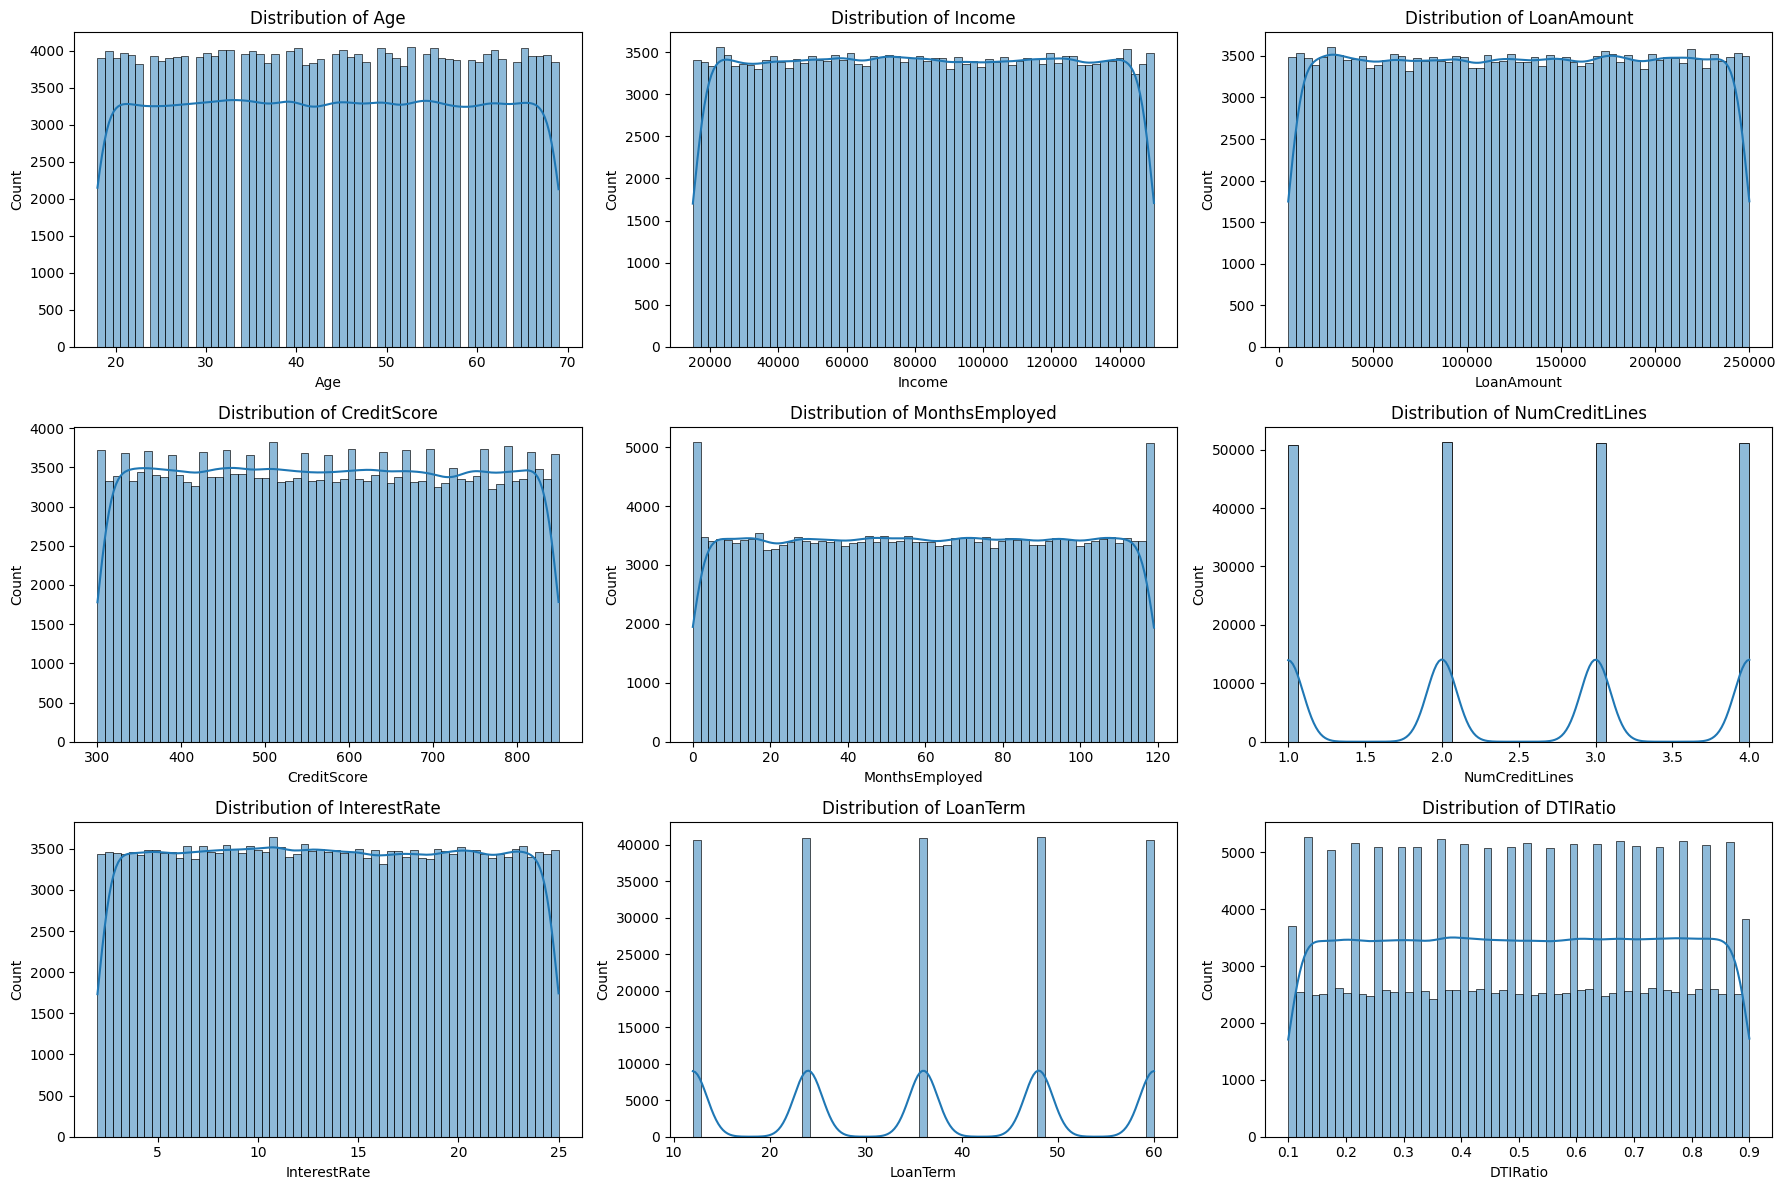

In [148]:
numerical_features = train_df.select_dtypes(include=np.number).columns.tolist()
numerical_features.remove("Default")

n_cols = 3
n_rows = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(numerical_features):
    sns.histplot(train_df[col], kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

### Correlation Analysis

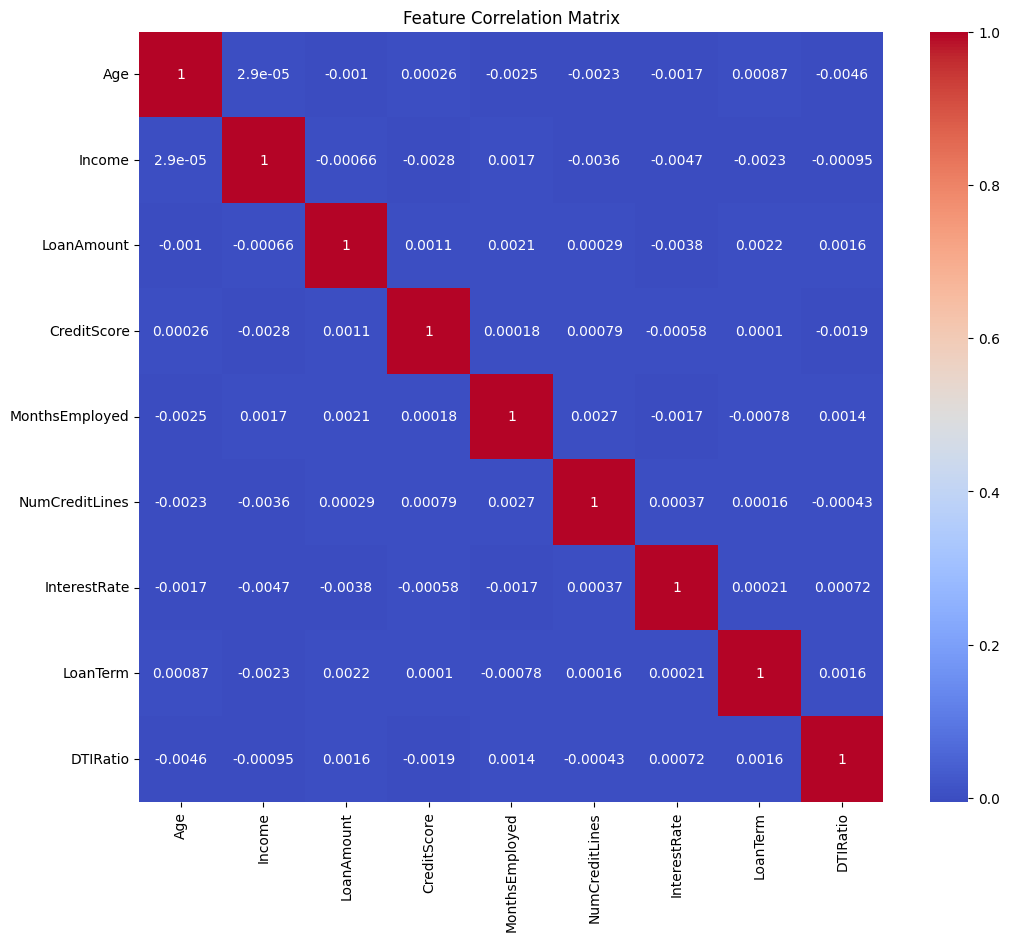

In [149]:
plt.figure(figsize=(12, 10))
sns.heatmap(train_df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

### Distribution of Categorical Features

In [150]:
categorical_features = train_df.select_dtypes(include='object').columns.tolist()

for col in categorical_features:
    print(f'Value counts for {col}:')
    print(train_df[col].value_counts())
    print('\n')

Value counts for Education:
Education
Bachelor's     51483
High School    51046
PhD            50980
Master's       50768
Name: count, dtype: int64


Value counts for EmploymentType:
EmploymentType
Part-time        51460
Unemployed       50994
Full-time        50921
Self-employed    50902
Name: count, dtype: int64


Value counts for MaritalStatus:
MaritalStatus
Married     68217
Divorced    68137
Single      67923
Name: count, dtype: int64


Value counts for HasMortgage:
HasMortgage
Yes    102145
No     102132
Name: count, dtype: int64


Value counts for HasDependents:
HasDependents
Yes    102180
No     102097
Name: count, dtype: int64


Value counts for LoanPurpose:
LoanPurpose
Business     40984
Home         40878
Education    40855
Other        40829
Auto         40731
Name: count, dtype: int64


Value counts for HasCoSigner:
HasCoSigner
Yes    102196
No     102081
Name: count, dtype: int64




### Count plots for Categorical Features

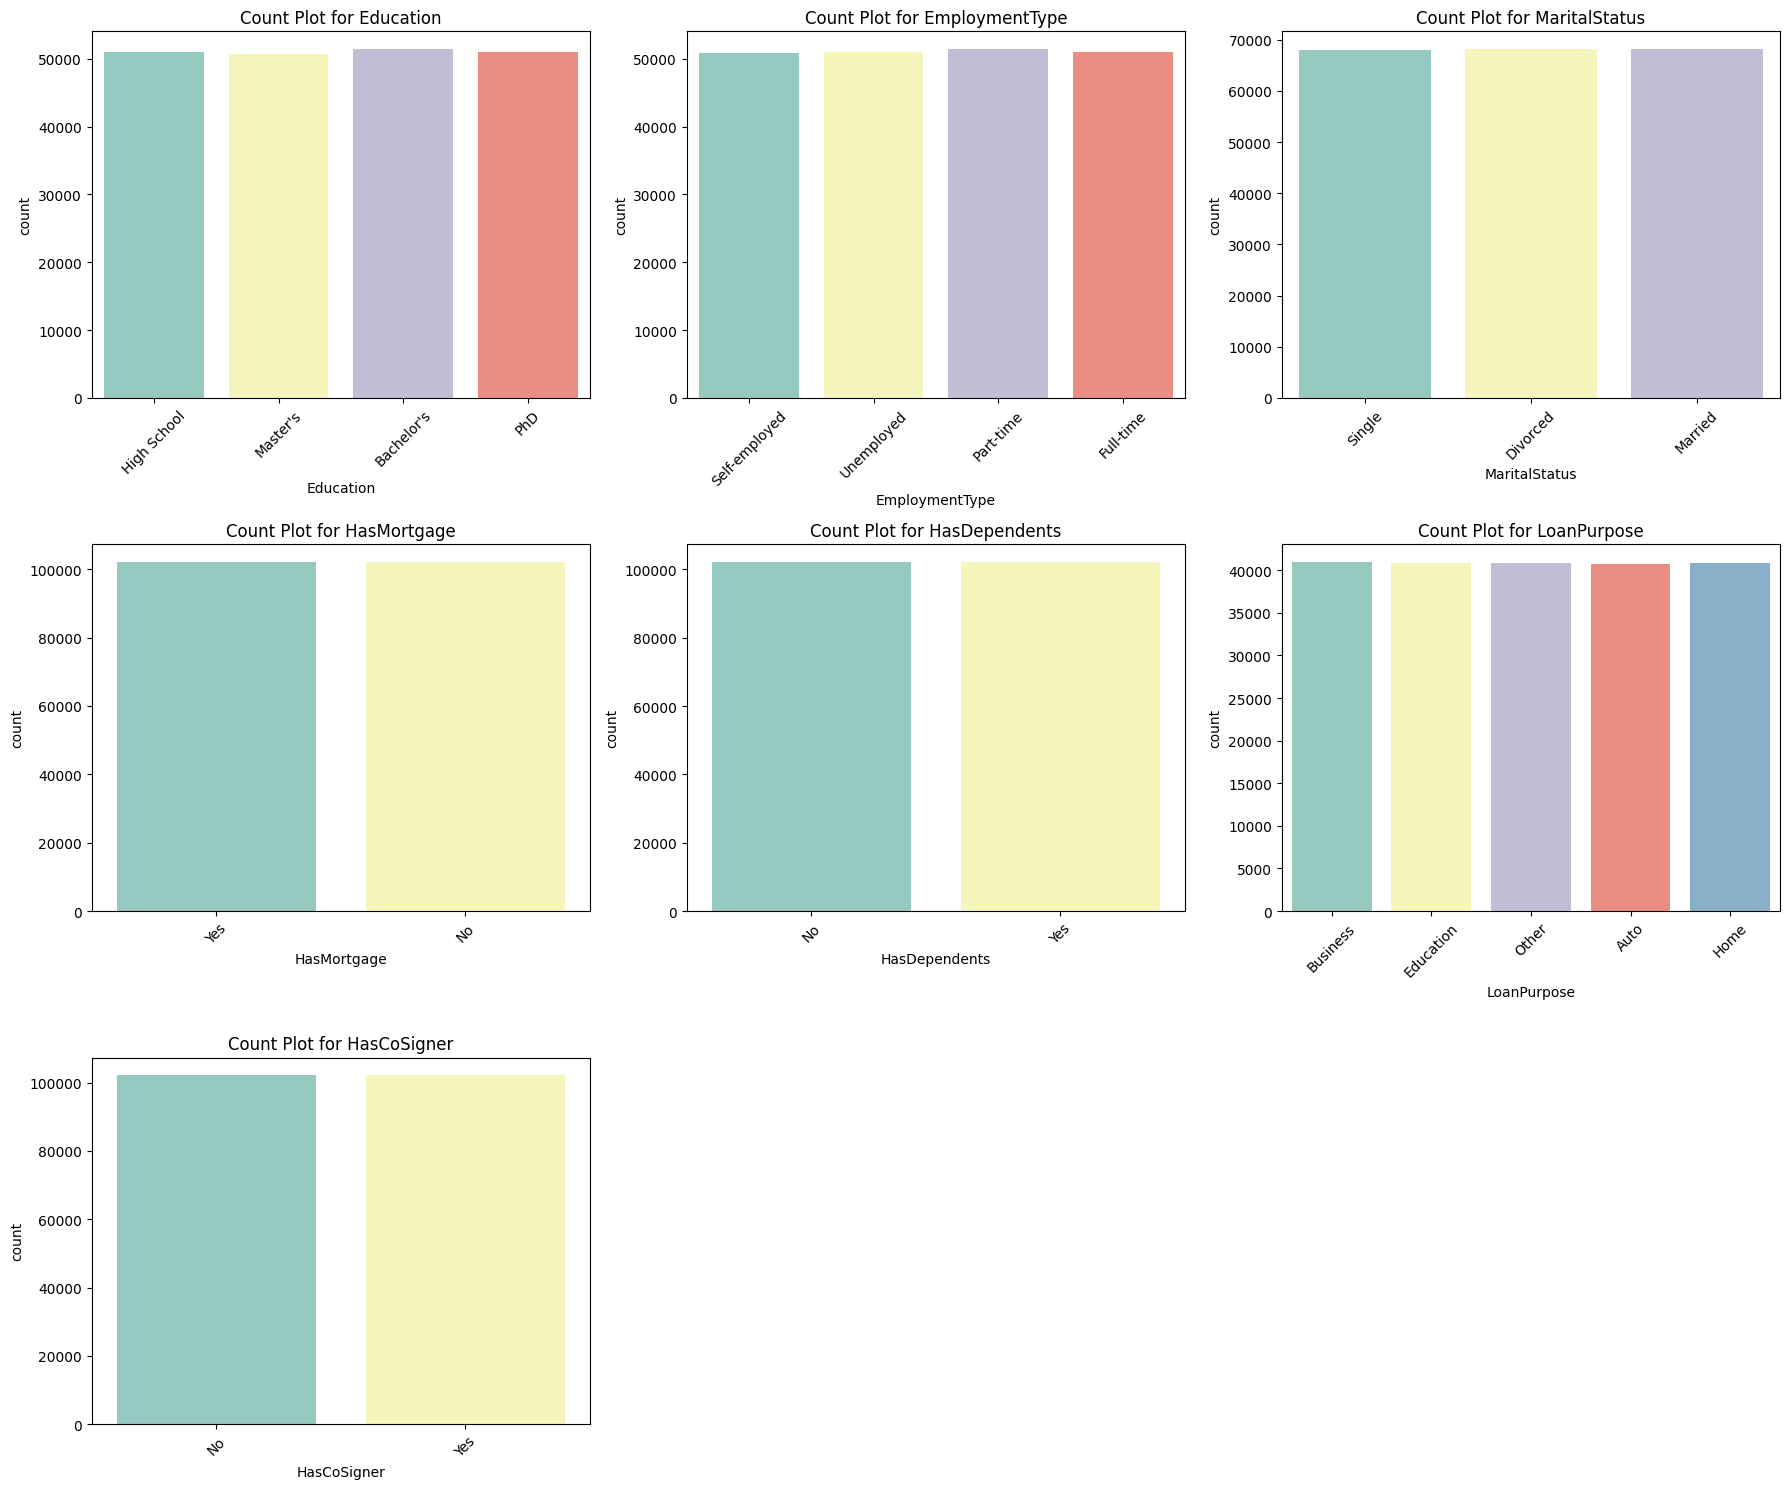

In [151]:
n_cols = 3
n_rows = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))
axes = axes.flatten()

for idx, col in enumerate(categorical_features):
    sns.countplot(data=train_df, x=col, palette='Set3', ax=axes[idx])
    axes[idx].set_title(f'Count Plot for {col}')
    axes[idx].tick_params(axis='x', rotation=45)

for idx in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

### Default Loans Distributions

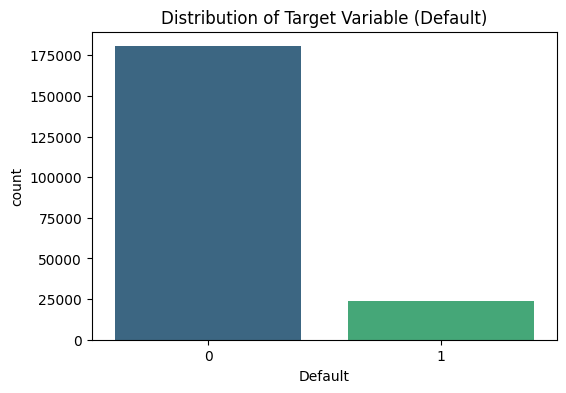

In [152]:
# Analyzing target variable(Defaults)
plt.figure(figsize=(6, 4))
sns.countplot(x='Default', data=train_df, palette='viridis')
plt.title('Distribution of Target Variable (Default)')
plt.show()

### Default Distribution for Categorical Features

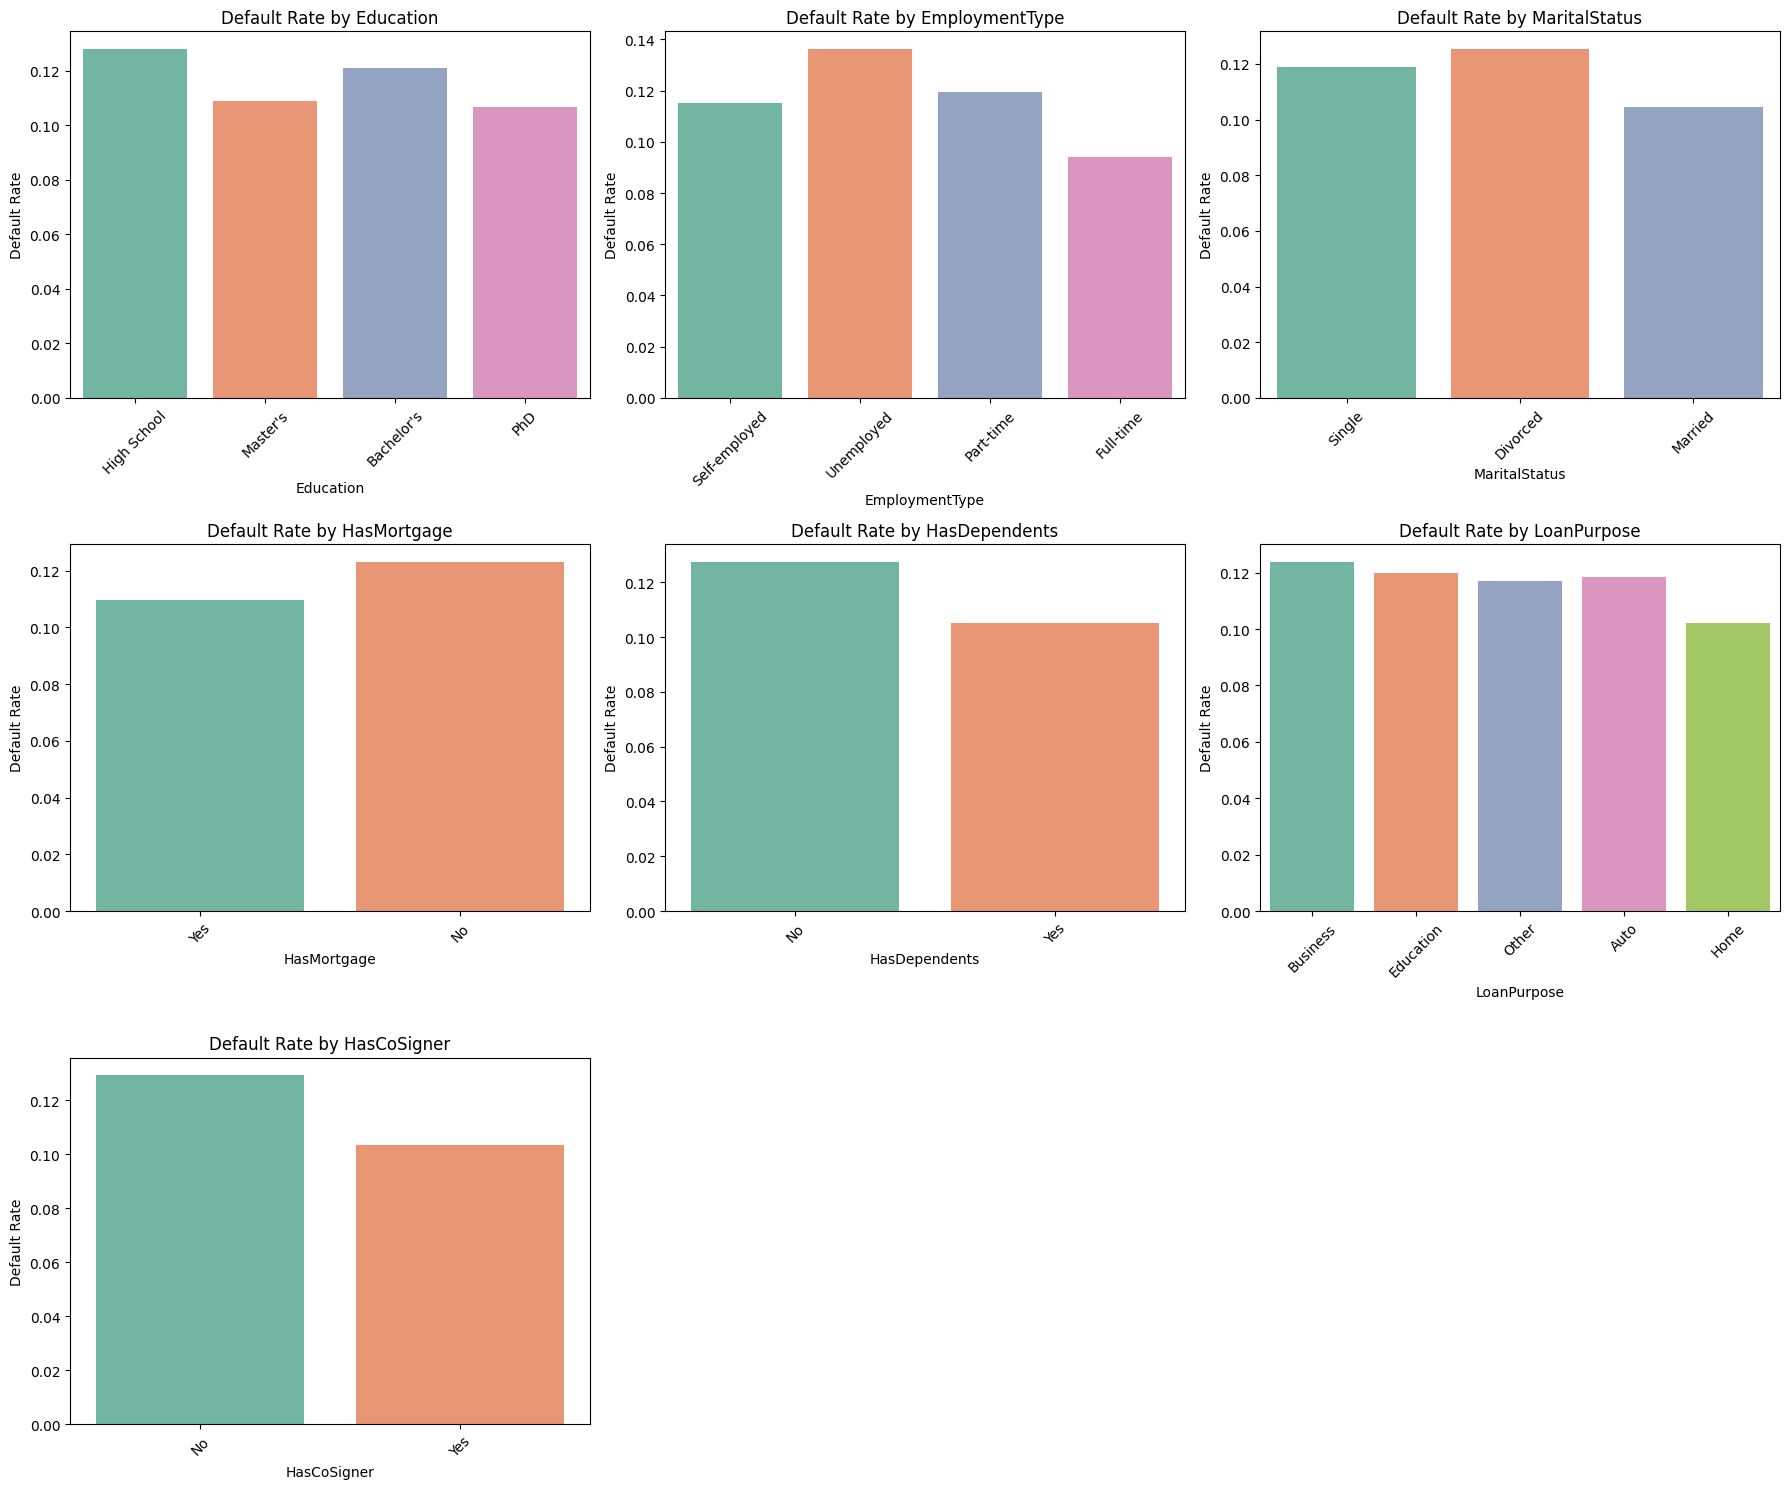

In [153]:
n_cols = 3
n_rows = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))
axes = axes.flatten()

for idx, col in enumerate(categorical_features):
    sns.barplot(
        x=col,
        y='Default',
        data=train_df,
        estimator=lambda x: sum(x) / len(x),
        ci=None,
        palette='Set2',
        ax=axes[idx]
    )
    axes[idx].set_title(f'Default Rate by {col}')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].set_ylabel('Default Rate')

for idx in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

### Detecting Outliers using BoxPlot

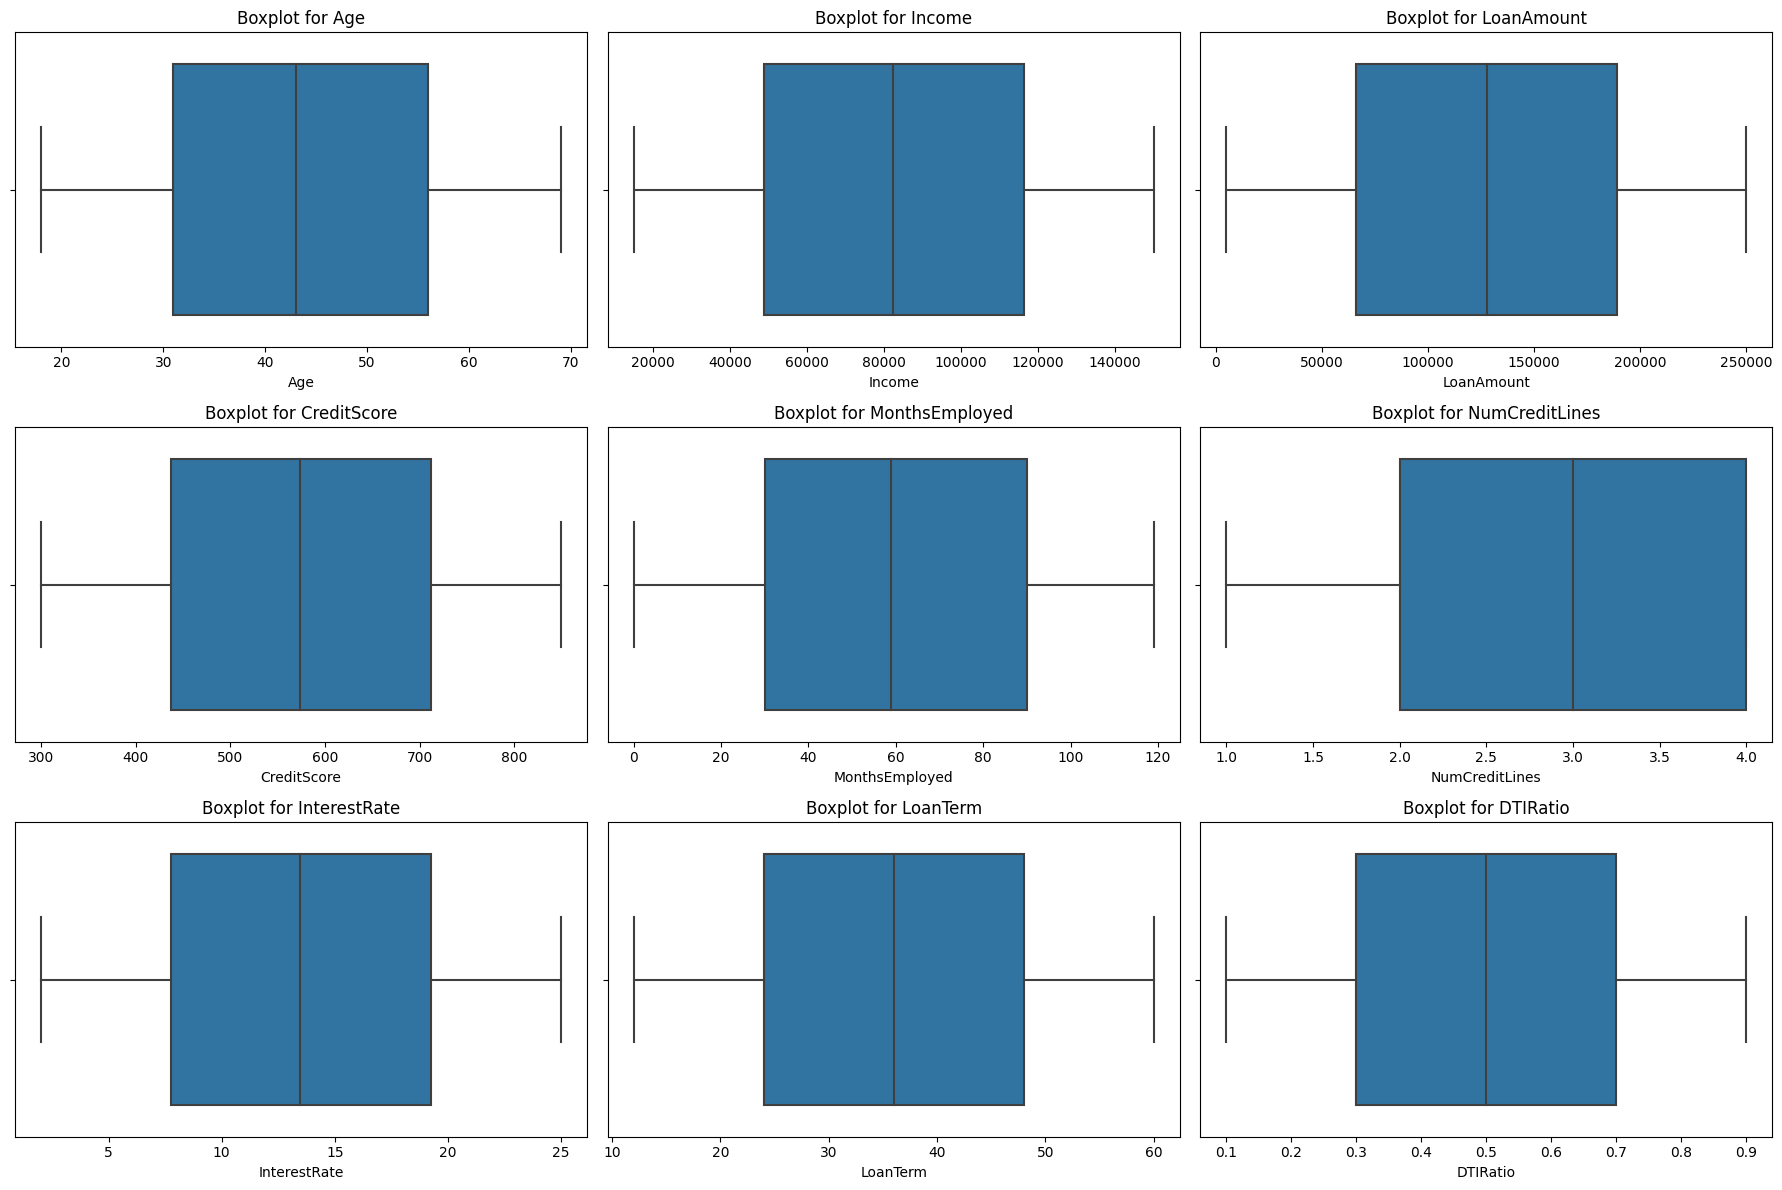

In [154]:
n_cols = 3
n_rows = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(numerical_features):
    sns.boxplot(x=train_df[col], ax=axes[idx])
    axes[idx].set_title(f'Boxplot for {col}')

plt.tight_layout()
plt.show()


In [155]:
# def handle_outliers(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
#     df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# for col in ['Age', 'Income', 'LoanAmount', 'CreditScore']:
#     handle_outliers(train_df, col)

# # Checking the new shape after removing outliers
# print("Shape after outlier removal:", train_df.shape)

> We get to see that there are no outlier in the above training data therefore commented above outlier removal

## Feature Engineering

### Income to Loan Ratio

In [156]:
# we are adding a new column "Income to loan ratio"
train_df['Income_to_Loan_Ratio'] = train_df['Income'] / (train_df['LoanAmount'] + 1)
test_df['Income_to_Loan_Ratio'] = test_df['Income'] / (test_df['LoanAmount'] + 1)

> A higher loan amount compared to income could indicate more financial risk. The addition of +1 in the denominator is a precautionary step to avoid division by zero in case of a zero loan amount, though it is unlikely with real-world data.

### Binning Continuous Numerical Features

> The impact of age on the likelihood of loan default may not be linear (e.g., very young and very old individuals may have different risk profiles

In [158]:
# Binning Age into young, middle-aged, older, senior
train_df['Age_bin'] = pd.cut(train_df['Age'], bins=[18, 31, 43, 56, 69], labels=[0, 1, 2, 3])
test_df['Age_bin'] = pd.cut(test_df['Age'], bins=[18, 31, 43, 56, 69], labels=[0, 1, 2, 3])

> Similarly binning all the other features based on the range and quartiles.

In [159]:
# Binning Income into low, medium, high, very high income
train_df['Income_bin'] = pd.cut(train_df['Income'], bins=[15000, 48878, 82400, 116247, 149999], labels=[0, 1, 2, 3])
test_df['Income_bin'] = pd.cut(test_df['Income'], bins=[15000, 48878, 82400, 116247, 149999], labels=[0, 1, 2, 3])

# Binning LoanAmount into small, medium, large, very large loans
train_df['LoanAmount_bin'] = pd.cut(train_df['LoanAmount'], bins=[5001, 66059, 127603, 188843, 249999], labels=[0, 1, 2, 3])
test_df['LoanAmount_bin'] = pd.cut(test_df['LoanAmount'], bins=[5001, 66059, 127603, 188843, 249999], labels=[0, 1, 2, 3])

# Binning CreditScore into risk categories
train_df['CreditScore_bin'] = pd.cut(train_df['CreditScore'], bins=[300, 437, 574, 712, 849], labels=[0, 1, 2, 3])
test_df['CreditScore_bin'] = pd.cut(test_df['CreditScore'], bins=[300, 437, 574, 712, 849], labels=[0, 1, 2, 3])

# Binning DTI ratio into low, moderate, high, very high risk
train_df['DTIRatio_bin'] = pd.cut(train_df['DTIRatio'], bins=[0.1, 0.3, 0.5, 0.7, 0.9], labels=[0, 1, 2, 3])
test_df['DTIRatio_bin'] = pd.cut(test_df['DTIRatio'], bins=[0.1, 0.3, 0.5, 0.7, 0.9], labels=[0, 1, 2, 3])

In [160]:
display(train_df.head())

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,...,HasDependents,LoanPurpose,HasCoSigner,Default,Income_to_Loan_Ratio,Age_bin,Income_bin,LoanAmount_bin,CreditScore_bin,DTIRatio_bin
0,18,137576,209136,846,26,2,10.47,60,0.81,High School,...,No,Business,No,0,0.657827,NaN,3,3,3,3
1,47,57194,5970,748,30,2,19.72,36,0.73,High School,...,Yes,Education,No,0,9.578630,2,1,0,3,3
2,26,84328,95065,453,7,2,24.25,12,0.45,Master's,...,No,Other,Yes,0,0.887047,0,2,1,1,1
3,53,49795,229582,533,107,3,14.44,60,0.17,Bachelor's,...,No,Auto,Yes,1,0.216893,2,1,3,1,0
4,49,115450,22072,840,0,4,24.48,12,0.11,Bachelor's,...,Yes,Education,Yes,0,5.230372,2,2,0,3,0


## Preprocessing

In [161]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import category_encoders

# Split features and target
X = train_df.drop(['Default'], axis=1)
y = train_df['Default']

numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply transformations
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)

## Model Training

In [162]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import pickle
import joblib

### Hyperparameter Tunning

In [163]:
# # Hyperparameter grids

# dt_params = {
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# rf_params = {
#     'n_estimators': [300,400, 500],
#     'max_depth': [10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# xgb_params = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 4, 5],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'subsample': [0.6, 0.8, 1.0]
# }

# catboost_params = {
#     'depth': [4, 6, 8],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'iterations': [200, 300, 400],
#     'l2_leaf_reg': [1, 3, 5],
#     'bagging_temperature': [0.3, 0.7, 1],
#     'random_strength': [1, 2, 5]
# }

# ada_params = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 1]
# }

# # Dictionary to store models, parameters
# models = {
#     'RandomForest': (RandomForestClassifier(random_state=42), rf_params),
#     'XGBoost': (XGBClassifier(random_state=42, eval_metric='logloss'), xgb_params),
#     'CatBoost': (CatBoostClassifier(random_state=42, verbose=0), catboost_params),
#     'AdaBoost': (AdaBoostClassifier(random_state=42), ada_params),
#     'DecisionTree': (DecisionTreeClassifier(random_state=42), dt_params)
# }

# best_estimators = {}

# # Perform RandomizedSearchCV for each model and save best estimators
# for model_name, (model, params) in models.items():
#     search = RandomizedSearchCV(
#         model, params, n_iter=10, scoring='accuracy', cv=3, random_state=42, n_jobs=-1
#     )
#     search.fit(X_train, y_train)
    
#     # Save the best estimator for future use
#     best_estimators[model_name] = search.best_estimator_
#     print(f"{model_name} Best Parameters:", search.best_params_)

> The above code taking a lot of time therefore we commented it. The best parameter which we are getting after the above code are used in the below models

### After Parameter Tunning

Decision Tree Classifier Accuracy: 0.8248645649761764
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90     54106
           1       0.22      0.19      0.21      7178

    accuracy                           0.82     61284
   macro avg       0.56      0.55      0.55     61284
weighted avg       0.82      0.82      0.82     61284



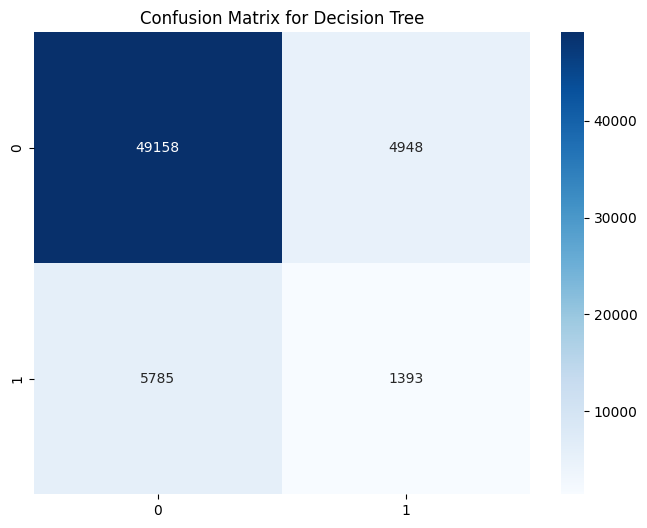

XGBoost Classifier Accuracy: 0.8853208015142615
Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     54106
           1       0.59      0.07      0.13      7178

    accuracy                           0.89     61284
   macro avg       0.74      0.53      0.53     61284
weighted avg       0.85      0.89      0.84     61284



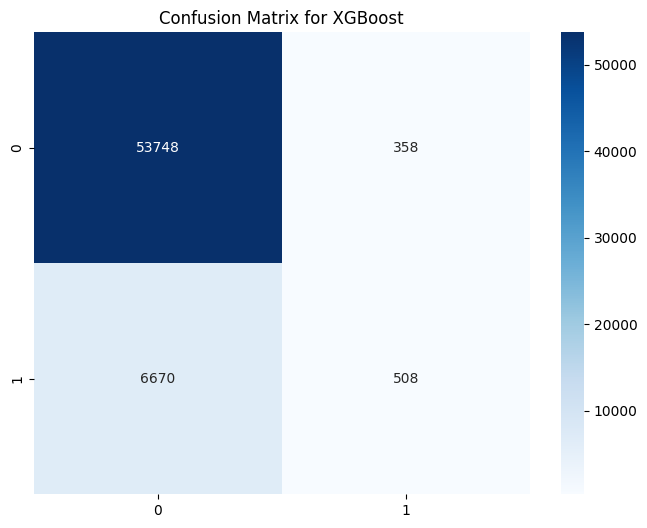

CatBoost Classifier Accuracy: 0.8853860714052607
Classification Report for CatBoost:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     54106
           1       0.61      0.06      0.11      7178

    accuracy                           0.89     61284
   macro avg       0.75      0.53      0.52     61284
weighted avg       0.86      0.89      0.84     61284



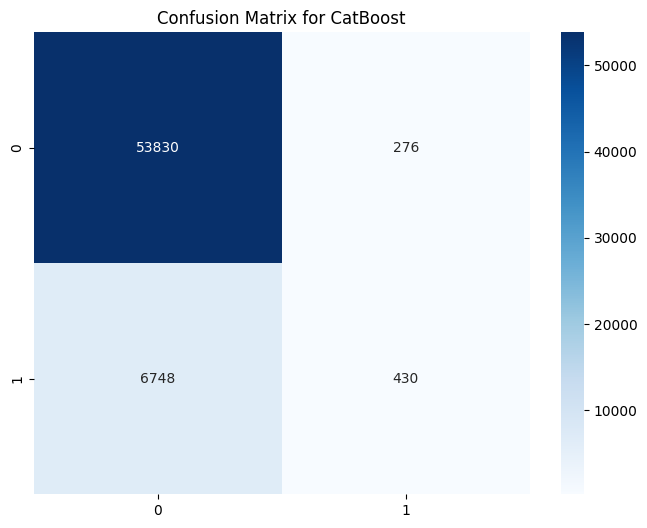

AdaBoost Classifier Accuracy: 0.8849291821682658
Classification Report for AdaBoost:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     54106
           1       0.57      0.07      0.12      7178

    accuracy                           0.88     61284
   macro avg       0.73      0.53      0.53     61284
weighted avg       0.85      0.88      0.84     61284



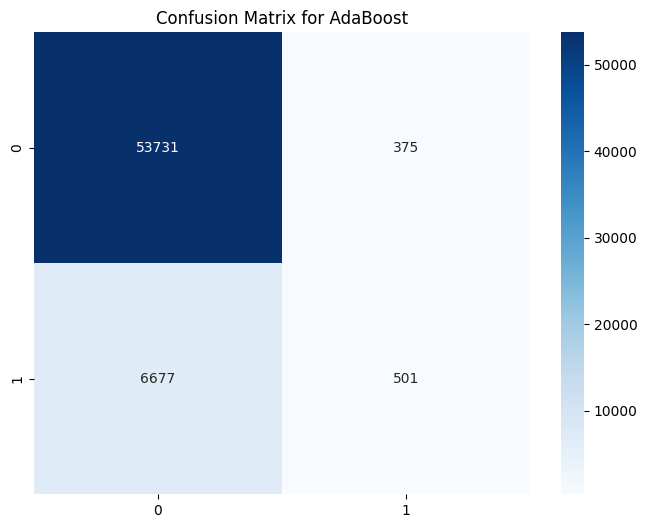

In [164]:
#best params for each model i have fine tunned them with randomsearchCV

dt_params = {'max_depth': 20,'min_samples_split': 5,'min_samples_leaf': 3}

rf_params =  {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 30}

xgb_params = {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1}

catboost_params = {'random_strength': 2, 'learning_rate': 0.05, 'l2_leaf_reg': 3, 'iterations': 300, 'depth': 4, 'bagging_temperature': 0.5}

ada_params = {'n_estimators': 100, 'learning_rate': 1}

# Instantiate models with best parameters
dt_best = DecisionTreeClassifier(**dt_params, random_state=42)
rf_best = RandomForestClassifier(**rf_params, random_state=42)
xgb_best = XGBClassifier(**xgb_params, random_state=42, eval_metric='logloss')
catboost_best = CatBoostClassifier(**catboost_params, random_state=42, verbose=0)
ada_best = AdaBoostClassifier(**ada_params, random_state=42)

# Train and evaluate Decision Tree Classifier
dt_best.fit(X_train, y_train)
dt_val_preds = dt_best.predict(X_val)
dt_accuracy = accuracy_score(y_val, dt_val_preds)
print("Decision Tree Classifier Accuracy:", dt_accuracy)
print("Classification Report for Decision Tree:\n", classification_report(y_val, dt_val_preds))

# Confusion Matrix for Decision Tree
conf_matrix_dt = confusion_matrix(y_val, dt_val_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# Train and evaluate Random Forest Classifier
rf_best.fit(X_train, y_train)
rf_val_preds = rf_best.predict(X_val)
rf_accuracy = accuracy_score(y_val, rf_val_preds)
print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Classification Report for Random Forest:\n", classification_report(y_val, rf_val_preds))

# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_val, rf_val_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Train and evaluate XGBoost Classifier
xgb_best.fit(X_train, y_train)
xgb_val_preds = xgb_best.predict(X_val)
xgb_accuracy = accuracy_score(y_val, xgb_val_preds)
print("XGBoost Classifier Accuracy:", xgb_accuracy)
print("Classification Report for XGBoost:\n", classification_report(y_val, xgb_val_preds))

# Confusion Matrix for XGBoost
conf_matrix_xgb = confusion_matrix(y_val, xgb_val_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for XGBoost')
plt.show()

# Train and evaluate CatBoost Classifier
catboost_best.fit(X_train, y_train)
catboost_val_preds = catboost_best.predict(X_val)
catboost_accuracy = accuracy_score(y_val, catboost_val_preds)
print("CatBoost Classifier Accuracy:", catboost_accuracy)
print("Classification Report for CatBoost:\n", classification_report(y_val, catboost_val_preds))

# Confusion Matrix for CatBoost
conf_matrix_catboost = confusion_matrix(y_val, catboost_val_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_catboost, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for CatBoost')
plt.show()

# Train and evaluate AdaBoost Classifier
ada_best.fit(X_train, y_train)
ada_val_preds = ada_best.predict(X_val)
ada_accuracy = accuracy_score(y_val, ada_val_preds)
print("AdaBoost Classifier Accuracy:", ada_accuracy)
print("Classification Report for AdaBoost:\n", classification_report(y_val, ada_val_preds))

# Confusion Matrix for AdaBoost
conf_matrix_ada = confusion_matrix(y_val, ada_val_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ada, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for AdaBoost')
plt.show()

## Final Prediction and Submission

In [165]:
#best model from the above observation and final submission accuracy
best_model = catboost_best

test_df_ids = test_df['LoanID']
# Drop 'LoanID' from the features before applying transformations
test_df = test_df.drop(columns=['LoanID'])

# Transform the test data using the preprocessor
X_test = preprocessor.transform(test_df)

# Generate predictions
test_predictions = best_model.predict(X_test)

# Create the submission DataFrame
submission_df = pd.DataFrame({
    'LoanID': test_df_ids,
    'Default': test_predictions
})

# Export the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

print("Submission file created.")

Submission file created.
